# Análise exploratória para a entrega 2

## Indíce
1. [Introdução](#introducao)
2. [Importando as dependências](#importando-as-dependências)
3. [Importando os datasets](#importando-os-datasets)
4. [Ativos e demitidos (com entrevistas)](#ativos-e-demitidos-com-entrevistas)
    - [Colunas principais](#colunas-principais)
    - [Coluna IDADE](#coluna-idade)
    - [Coluna SEXO](#coluna-sexo)
    - [Coluna DATA DE ADMISSÃO](#coluna-data-de-admissão)
    - [Coluna DATA DE DEMISSÃO](#coluna-data-de-demissao)
    - [Coluna]()
5. [Análise de Demitidos Voluntários](#analise-demitidos-voluntarios)

## Introdução

Estamos lidando inicialmente com 2 datasets diferentes:

- **SRA Ativo e Demitidos**: Tabela com a lista de funcionários ativos e desligados
- **Entrevistas**: tabela com dados das entrevistas demessionais conduzidas com funcionários que pedem para ser desligados da companhia

Abaixo iremos explorar melhor o que compõe cada dataset.

## Importando as dependências

Dependências gerais

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Dependência específica para usar o google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Importando os datasets

In [8]:
sra = pd.read_excel("../data/SRA Ativo e Demitidos Ajustes.xlsx")
entrevistas = pd.read_excel("../data/Entrevistas Ajustes.xlsx")

Agrupamento dos `DataFrames` de pessoas Ativas e Demitidas com o de Entrevistas de Desligamento para facilitar análises e correlações abaixo.

In [9]:
sra = pd.merge(sra, entrevistas, how='left')

## Ativos e Demitidos (com Entrevistas)

Qual o aspecto geral do `DataFrame`?

In [10]:
sra.head()

,DESC.FIL,MATRICULA,FUNCAO,ADMISSAO,DEMISSAO,IDADE,SEXO,EST.CIVIL,SIT. FOLHA,DIRETOR,...,DESCR_RECISAO,CERTIFICAÇÕES,CARREIRA,DESENVOLVIMENTO PROFISSIONAL,REMUNERAÇÃO,BENEFÍCIOS,CLIMA,CULTURA,BEM ESTAR,OUTROS
0,CANDELARIA II,168186,921,2011-11-07,2022-01-07 00:00:00,53,M,SOLTEIRO(A),DEMITIDO,CLOUD PORTIFOLIO,...,DISPENSA SEM JUSTA CAUSA (API),0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CANDELARIA II,236946,201,2014-02-05,2022-01-07 00:00:00,38,M,SOLTEIRO(A),DEMITIDO,CLOUD PORTIFOLIO,...,PEDIDO DE DEMISSAO,0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0
2,CANDELARIA II,265449,604,2011-05-02,2022-01-03 00:00:00,35,M,CASADO(A),DEMITIDO,CLIENTE E SALES,...,PEDIDO DE DEMISSAO,0,0.0,0.0,1.0,1.0,0.0,1.0,1,1.0
3,CANDELARIA II,280823,111,2015-09-08,2022-01-06 00:00:00,33,F,SOLTEIRO(A),DEMITIDO,CLOUD PORTIFOLIO,...,DISPENSA SEM JUSTA CAUSA (API),0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CANDELARIA II,294487,919,2016-10-03,2022-01-04 00:00:00,35,M,CASADO(A),DEMITIDO,CLOUD PORTIFOLIO,...,PEDIDO DE DEMISSAO C/ DESC AVP,0,1.0,1.0,1.0,1.0,1.0,0.0,1,0.0


**Existem dados nulos? Quantos são?**

Sim, nas colunas `DEMISSAO`, `SIT. FOLHA`, `TIPO DEMISSÃO`, `TIPO_RES`, `DESCR_RECISAO`, `COD_TO` e `MOTIVO TO`. Isso de deve ao fato de que nem todos na base são desligados, alguns ainda estão ativos. E para esses as colunas relativas à demissão estão vazias, como é de se esperar.

In [11]:
sra = sra.replace("-", np.nan)
sra = sra.replace("/  /", np.nan)
sra.isnull().sum()

DESC.FIL                           0
MATRICULA                          0
FUNCAO                             0
ADMISSAO                           0
DEMISSAO                        4046
IDADE                              0
SEXO                               0
EST.CIVIL                          0
SIT. FOLHA                         0
DIRETOR                            0
HOME                               0
TIPO DEMISSÃO                   4046
TIPO_RES                        4046
DESCR_RECISAO                   4046
CERTIFICAÇÕES                      0
CARREIRA                        5099
DESENVOLVIMENTO PROFISSIONAL    5099
REMUNERAÇÃO                     5099
BENEFÍCIOS                      5099
CLIMA                           5099
CULTURA                         5099
BEM ESTAR                       5099
OUTROS                          5099
dtype: int64

**Quais as colunas, tipos e outras informações básicas?**

Temos 6021 entradas (linhas) no total, e 23 colunas.

In [14]:
sra.describe()

,IDADE,TIPO_RES,CERTIFICAÇÕES,CARREIRA,DESENVOLVIMENTO PROFISSIONAL,REMUNERAÇÃO,BENEFÍCIOS,CLIMA,CULTURA,OUTROS
count,6021.00000,1975.000000,6021.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,37.04750,7.620253,0.425345,0.480477,0.670282,0.473970,0.668113,0.444685,0.409978,0.414317
std,10.24436,9.295585,1.701557,0.499890,0.470366,0.499593,0.471146,0.497201,0.492096,0.492871
min,15.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.00000,5.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,43.00000,6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,74.00000,42.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
sra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6021 entries, 0 to 6020
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DESC.FIL                      6021 non-null   object        
 1   MATRICULA                     6021 non-null   object        
 2   FUNCAO                        6021 non-null   object        
 3   ADMISSAO                      6021 non-null   datetime64[ns]
 4   DEMISSAO                      1975 non-null   datetime64[ns]
 5   IDADE                         6021 non-null   int64         
 6   SEXO                          6021 non-null   object        
 7   EST.CIVIL                     6021 non-null   object        
 8   SIT. FOLHA                    6021 non-null   object        
 9   DIRETOR                       6021 non-null   object        
 10  HOME                          6021 non-null   object        
 11  TIPO DEMISSÃO                 

In [15]:
print(f"O DataFrame tem {len(sra.columns)} colunas.\n")

for column in sra.columns:
    print(
        f"A coluna {column} tem o tipo {'string' if sra[column].dtype == 'object' else sra[column].dtype}.")

O DataFrame tem 23 colunas.

A coluna DESC.FIL tem o tipo string.
A coluna MATRICULA tem o tipo string.
A coluna FUNCAO tem o tipo string.
A coluna ADMISSAO tem o tipo datetime64[ns].
A coluna DEMISSAO tem o tipo datetime64[ns].
A coluna IDADE tem o tipo int64.
A coluna SEXO tem o tipo string.
A coluna EST.CIVIL tem o tipo string.
A coluna SIT. FOLHA tem o tipo string.
A coluna DIRETOR tem o tipo string.
A coluna HOME tem o tipo string.
A coluna TIPO DEMISSÃO tem o tipo string.
A coluna TIPO_RES tem o tipo float64.
A coluna DESCR_RECISAO tem o tipo string.
A coluna CERTIFICAÇÕES tem o tipo int64.
A coluna CARREIRA tem o tipo float64.
A coluna DESENVOLVIMENTO PROFISSIONAL tem o tipo float64.
A coluna REMUNERAÇÃO tem o tipo float64.
A coluna BENEFÍCIOS tem o tipo float64.
A coluna CLIMA tem o tipo float64.
A coluna CULTURA tem o tipo float64.
A coluna BEM ESTAR tem o tipo string.
A coluna OUTROS tem o tipo float64.


### Colunas principais

|Coluna|Descrição|
|---|---|
|IDADE|Idade em que a pessoa foi desligada|
|SEXO|Dado categórico, dividido em Masculino e Feminino|
|DATA DE ADMISSÃO|Data em que a pessoa foi contratada|
|DATA DE DEMISSÃO|Data em que foi desligada (voluntariamente ou não), o que nos permite calcular (junto da coluna acima) o tempo de permanência da pessoa na empresa|
|SALÁRIO|Valor bruto, em Reais, recebido pela pessoa|
|ESTADO|Estado brasileiro (note que só temos dados do Brasil) de residência da pessoa|
|TIPO DE DEMISSÃO|Se forçada (PROVOCADO) ou voluntária (VOLUNTARIA) ou se a pessoa estava em período de experiência (EXPERIENCIA)|
|CERTIFICAÇÕES|Quantas certificações (quantidade numérica) os funcionários eventualmente possuem|
|CARREIRA|Avaliação, 0 se negativa, 1 se positiva, que os usuários dão ao deixar a empresa sobre desenvolvimento de carreira|
|REMUNERAÇÃO|Avaliação, 0 se negativa, 1 se positiva, que os usuários dão ao deixar a empresa sobre remuneração|
|BENEFÍCIOS|Avaliação, 0 se negativa, 1 se positiva, que os usuários dão ao deixar a empresa sobre os benefícios (vale alimentação, plano de saúde, &c)|
|CLIMA|Avaliação, 0 se negativa, 1 se positiva, que os usuários dão ao deixar a empresa sobre o clima na empresa|


### Coluna IDADE

<Axes: xlabel='IDADE', ylabel='Count'>

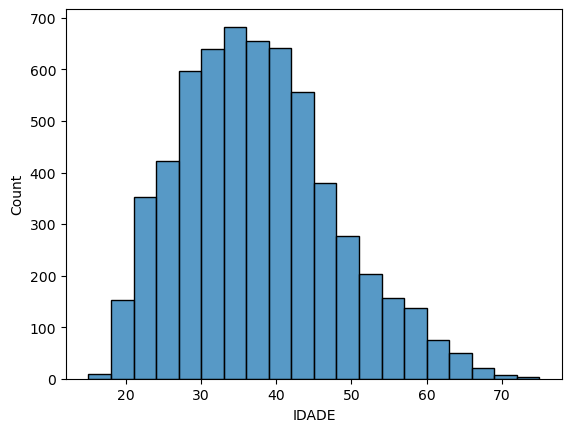

In [ ]:
sns.histplot(data=sra, x='IDADE', binwidth=3)

In [ ]:
sra['IDADE'].quantile([.05, .1, .25, .5, .75, .95])

0.05    22.0
0.10    24.0
0.25    29.0
0.50    36.0
0.75    43.0
0.95    56.0
Name: IDADE, dtype: float64

In [ ]:
sra['IDADE'].describe()

count    6020.000000
mean       37.043023
std        10.239318
min        15.000000
25%        29.000000
50%        36.000000
75%        43.000000
max        74.000000
Name: IDADE, dtype: float64

#### Coluna SEXO

Abaixo vemos a distribuição entre os sexos.

In [ ]:
sra['SEXO'].value_counts()

M    4419
F    1601
Name: SEXO, dtype: int64

E abaixo o histograma

<Axes: xlabel='SEXO', ylabel='Count'>

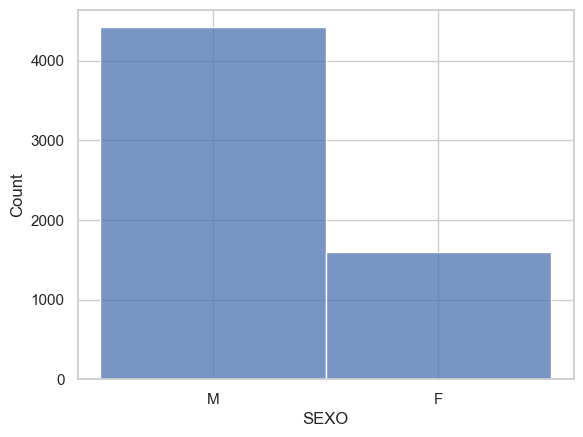

In [ ]:
sns.set_theme(style='whitegrid')
sns.histplot(data=sra, x='SEXO')

#### Coluna DATA DE ADMISSÃO

Convertendo os dados para `datetime`

In [ ]:
hire_date = pd.to_datetime(sra['ADMISSAO'])

Abaixo vemos a distribuição dos dados

<Axes: xlabel='ADMISSAO', ylabel='Count'>

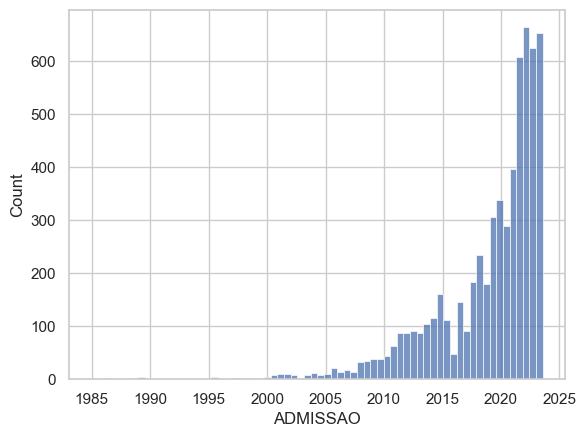

In [ ]:
sns.histplot(data=hire_date)

Descrevendo os dados um pouco mais de perto 👇

In [ ]:
hire_date.describe()

/var/folders/dm/yn213p851td579hjmn729b0m0000gn/T/ipykernel_9195/293986355.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hire_date.describe()


count                    6020
unique                   1788
top       2023-07-03 00:00:00
freq                       59
first     1985-01-02 00:00:00
last      2023-07-27 00:00:00
Name: ADMISSAO, dtype: object

Quantas pessoas foram contratadas antes do ano 2000?

In [ ]:
hire_date[hire_date < '2000'].value_counts().sum()

24

E os percentis? Como os dados estão distribuídos?

In [ ]:
hire_date.quantile([.1, .25, .5, .75, .95]).dt.date

0.10    2012-04-30
0.25    2017-01-29
0.50    2020-08-19
0.75    2022-04-05
0.95    2023-05-15
Name: ADMISSAO, dtype: object

### Coluna DATA DE DEMISSAO

Convertendo para `datetime`

In [ ]:
fire_date = pd.to_datetime(sra['DEMISSAO'])

**Quando a data de demissão é nula, as outras colunas de interesse também são?** Não, apenas o tipo de demissão é nulo quando a data de demissão o é. Ou seja, provavelmente faz sentido manter as linhas em que a data de demissão é nula.

In [ ]:
sra['ADMISSAO'][fire_date.isnull()].isnull().sum()

0

In [ ]:
sra['SALARIO'][fire_date.isnull()].isnull().sum()

0

In [ ]:
sra['TIPO DEMISSÃO'][fire_date.isnull()].isnull().sum()

4046

Qual a demissão mais antiga e a mais recente?

In [ ]:
fire_date.value_counts().sort_index()

2022-01-03    38
2022-01-04    13
2022-01-05     9
2022-01-06     3
2022-01-07    15
              ..
2023-07-19     1
2023-07-26     2
2023-07-27     1
2023-07-28     2
2023-07-31     3
Name: DEMISSAO, Length: 392, dtype: int64

Qual a distribuição das datas? Qual a média por mês?

In [ ]:
fire_date_month = fire_date.dropna().apply(lambda date: date.strftime('%Y-%m'))

In [ ]:
fire_date_month.value_counts().describe()

count     19.000000
mean     103.894737
std       21.042008
min       44.000000
25%       97.000000
50%      105.000000
75%      112.000000
max      148.000000
Name: DEMISSAO, dtype: float64

<Axes: xlabel='DEMISSAO', ylabel='Count'>

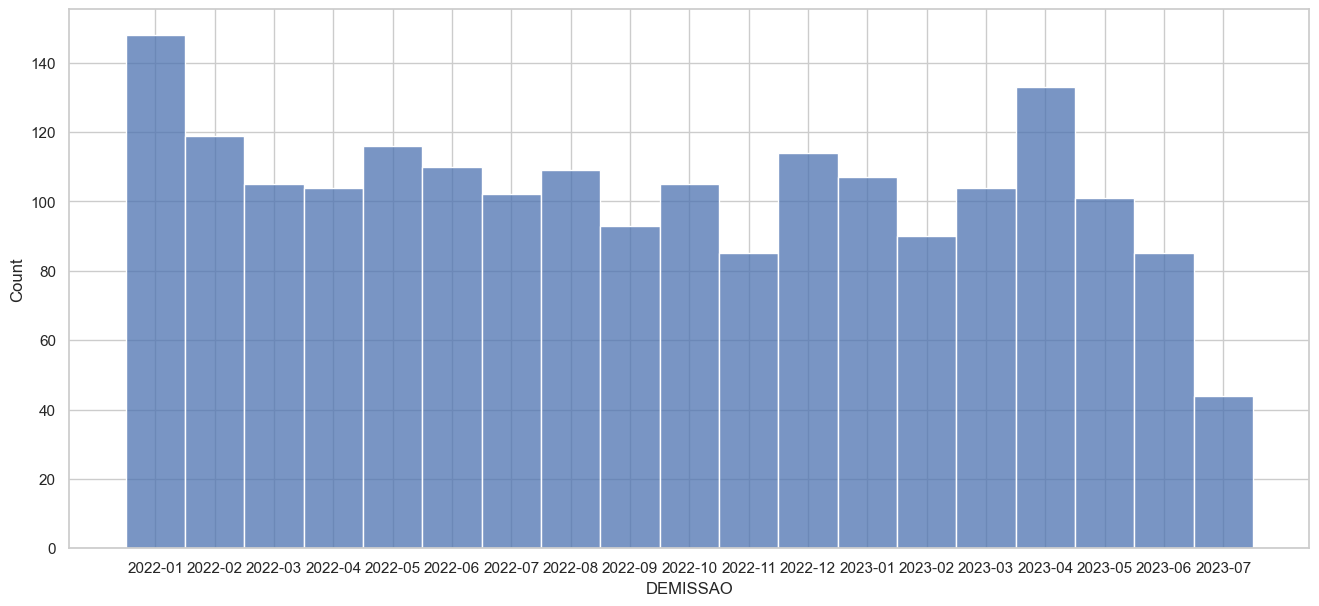

In [ ]:
plt.figure(figsize=(16, 7))
sns.histplot(data=fire_date_month)

### Coluna TIPO DE DEMISSÃO

In [20]:
sra['TIPO DEMISSÃO'].unique()

array(['PROVOCADO', 'VOLUNTARIO', 'EXPERIENCIA', nan], dtype=object)

In [19]:
sra['TIPO DEMISSÃO'].describe()

count           1975
unique             3
top       VOLUNTARIO
freq             922
Name: TIPO DEMISSÃO, dtype: object

Text(0.5, 1.0, 'Distribuição dos tipos de demissão')

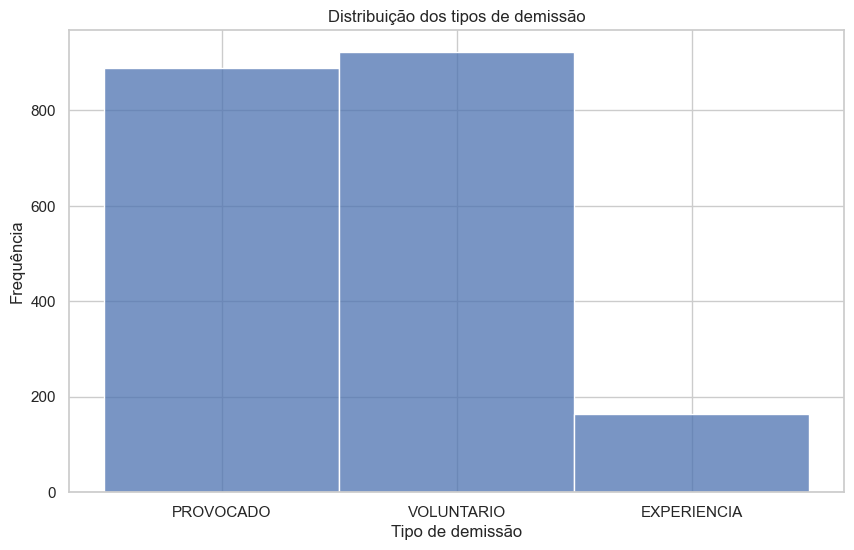

In [22]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=sra, x='TIPO DEMISSÃO')

plt.xlabel('Tipo de demissão')
plt.ylabel('Frequência')
plt.title('Distribuição dos tipos de demissão')

In [24]:
sra['TIPO DEMISSÃO'].value_counts()

VOLUNTARIO     922
PROVOCADO      890
EXPERIENCIA    163
Name: TIPO DEMISSÃO, dtype: int64

### Coluna CERTIFICAÇÕES

In [25]:
sra['CERTIFICAÇÕES'].describe()

count    6021.000000
mean        0.425345
std         1.701557
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        27.000000
Name: CERTIFICAÇÕES, dtype: float64

Text(0.5, 1.0, 'Distribuição da quatidade de certificações')

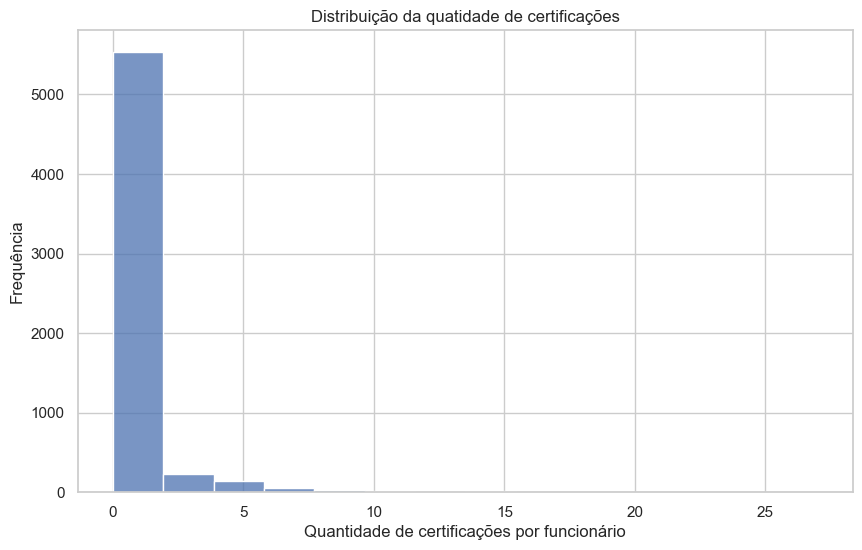

In [28]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=sra, x='CERTIFICAÇÕES')

plt.xlabel('Quantidade de certificações por funcionário')
plt.ylabel('Frequência')
plt.title('Distribuição da quatidade de certificações')

In [29]:
sra['CERTIFICAÇÕES'].quantile([.1, .25, .5, .75, .95, .99])

0.10    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.95    3.0
0.99    8.0
Name: CERTIFICAÇÕES, dtype: float64

In [30]:
print(f"O mínimo de certificações é {sra['CERTIFICAÇÕES'].min()}")
print(f"O máximo de certificações é {sra['CERTIFICAÇÕES'].max()}")

O mínimo de certificações é 0
O máximo de certificações é 27


## Analise Demitidos Voluntarios

In [78]:
Analise_Demitidos = sra[(sra['SIT. FOLHA']=='DEMITIDO') & (sra['TIPO DEMISSÃO']=='VOLUNTARIO')]
Analise_Demitidos['DIRETOR'].value_counts()

CLOUD PORTIFOLIO      658
CLIENTE E SALES       101
CLOUD & TECHNOLOGY     69
TAKODA                 31
P&C                    30
TECHFIN                10
SALES                  10
FINANCE                 8
TREASURY                4
JURIDICAL               1
Name: DIRETOR, dtype: int64

In [55]:
Analise_Demitidos[['DIRETOR','SEXO']].groupby(['DIRETOR','SEXO']).size()

DIRETOR             SEXO
CLIENTE E SALES     F        28
                    M        73
CLOUD & TECHNOLOGY  F        17
                    M        52
CLOUD PORTIFOLIO    F       156
                    M       502
FINANCE             F         6
                    M         2
JURIDICAL           M         1
P&C                 F        21
                    M         9
SALES               F         3
                    M         7
TAKODA              F         6
                    M        25
TECHFIN             F         3
                    M         7
TREASURY            F         2
                    M         2
dtype: int64

In [64]:
Analise_Demitidos.groupby(['DIRETOR'])['IDADE'].agg(['max','min','mean','median'])

,max,min,mean,median
DIRETOR,,,,
CLIENTE E SALES,57,18,34.821782,33.0
CLOUD & TECHNOLOGY,53,19,33.681159,32.0
CLOUD PORTIFOLIO,68,18,35.735562,35.0
FINANCE,49,22,32.125000,31.0
JURIDICAL,34,34,34.000000,34.0
P&C,53,18,31.100000,31.5
SALES,48,27,34.100000,32.5
TAKODA,56,20,34.935484,33.0
TECHFIN,45,18,32.300000,32.0


In [81]:
Analise_Motivos=Analise_Demitidos[['DIRETOR','CARREIRA','DESENVOLVIMENTO PROFISSIONAL','REMUNERAÇÃO','BENEFÍCIOS','CLIMA','CULTURA','BEM ESTAR','OUTROS']].groupby(['DIRETOR']).sum()
display(Analise_Motivos)

<ipython-input-81-902ff804f8b0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Analise_Motivos=Analise_Demitidos[['DIRETOR','CARREIRA','DESENVOLVIMENTO PROFISSIONAL','REMUNERAÇÃO','BENEFÍCIOS','CLIMA','CULTURA','BEM ESTAR','OUTROS']].groupby(['DIRETOR']).sum()


,CARREIRA,DESENVOLVIMENTO PROFISSIONAL,REMUNERAÇÃO,BENEFÍCIOS,CLIMA,CULTURA,OUTROS
DIRETOR,,,,,,,
CLIENTE E SALES,53.0,69.0,50.0,65.0,41.0,41.0,40.0
CLOUD & TECHNOLOGY,42.0,57.0,30.0,50.0,31.0,35.0,28.0
CLOUD PORTIFOLIO,303.0,419.0,315.0,434.0,287.0,259.0,266.0
FINANCE,7.0,7.0,3.0,3.0,7.0,2.0,4.0
JURIDICAL,1.0,1.0,1.0,1.0,0.0,0.0,0.0
P&C,11.0,21.0,12.0,23.0,20.0,12.0,14.0
SALES,5.0,10.0,6.0,8.0,3.0,7.0,6.0
TAKODA,14.0,23.0,13.0,23.0,16.0,15.0,19.0
TECHFIN,5.0,8.0,6.0,7.0,3.0,4.0,4.0


In [82]:
Analise_Motivos.corr()

,CARREIRA,DESENVOLVIMENTO PROFISSIONAL,REMUNERAÇÃO,BENEFÍCIOS,CLIMA,CULTURA,OUTROS
CARREIRA,1.000000,0.999729,0.998925,0.999052,0.998129,0.999460,0.998409
DESENVOLVIMENTO PROFISSIONAL,0.999729,1.000000,0.999216,0.999707,0.998954,0.999899,0.999211
REMUNERAÇÃO,0.998925,0.999216,1.000000,0.999558,0.998917,0.999077,0.999349
BENEFÍCIOS,0.999052,0.999707,0.999558,1.000000,0.999532,0.999700,0.999704
CLIMA,0.998129,0.998954,0.998917,0.999532,1.000000,0.998789,0.999486
CULTURA,0.999460,0.999899,0.999077,0.999700,0.998789,1.000000,0.999248
OUTROS,0.998409,0.999211,0.999349,0.999704,0.999486,0.999248,1.000000


In [86]:
Analise_Motivos.mean()

CARREIRA                        44.3
DESENVOLVIMENTO PROFISSIONAL    61.8
REMUNERAÇÃO                     43.7
BENEFÍCIOS                      61.6
CLIMA                           41.0
CULTURA                         37.8
OUTROS                          38.2
dtype: float64

In [87]:
Analise_Motivos.var()

CARREIRA                         8575.344444
DESENVOLVIMENTO PROFISSIONAL    16285.733333
REMUNERAÇÃO                      9324.900000
BENEFÍCIOS                      17591.155556
CLIMA                            7658.666667
CULTURA                          6238.400000
OUTROS                           6574.844444
dtype: float64

In [88]:
Analise_Motivos.std()

CARREIRA                         92.603156
DESENVOLVIMENTO PROFISSIONAL    127.615569
REMUNERAÇÃO                      96.565522
BENEFÍCIOS                      132.631654
CLIMA                            87.513808
CULTURA                          78.983543
OUTROS                           81.085414
dtype: float64